In [2]:
from os.path import dirname, abspath,join
from os import makedirs
import sys
import numpy as np
import pandas as pd
import json
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

root_path = dirname(abspath("./"))
import sys
sys.path.append(root_path)
from proT.evaluation.predict import *
from proT.evaluation.metrics import *

# plotting standard settings
plt.rcParams['figure.dpi'] = 100 #360 # standard is 360 but for set to 100 for practical visualization on the notebook
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['lines.linewidth'] = 1.5

S6 Mamba backend: mamba-pytorch (pure PyTorch fallback)


c:\Users\ScipioneFrancesco\Documents\Projects\proT\proT\baseline\s6\s6_wrapper.py:13: UserWarning: ⚠️  Using pure PyTorch implementation of Mamba (slower but functional). For faster performance on GPU clusters, install mamba-ssm with CUDA support: pip install mamba-ssm causal-conv1d
  warnings.warn(


## Load Experiment

In [4]:
models_sweep = [
    {
        "model"             : "transformer",
        "config_path"       : r"../experiments/training/tests/protocol/test_baseline_proT_ishigami_sum/config_proT_ishigami_v5_2.yaml",
        "checkpoint_path"   : r"../experiments/training/tests/protocol/test_baseline_proT_ishigami_sum/k_0/checkpoints/epoch0-initial.ckpt",
        },
    {
        "model"             : "transformer_2",
        "config_path"       : r"../experiments/training/tests/protocol/test_baseline_proT_ishigami_sum/config_proT_ishigami_v5_2.yaml",
        "checkpoint_path"   : r"../experiments/training/tests/protocol/test_baseline_proT_ishigami_sum/k_0/checkpoints/epoch0-initial.ckpt",
        },
]

datadir_path = "../data/input"

blank_vector = [0, 0.2, 0.4, 0.6, 0.8]


df_tot = None

for model_dict in models_sweep:
    
    # unpack
    model           = model_dict["model"]
    config_path     = model_dict["config_path"]
    checkpoint_path = model_dict["checkpoint_path"]

    config = OmegaConf.load(config_path)
    df_blank = None

    for blank_val in blank_vector:

        if blank_val == 0:
            blanking_fn = None
        else:
            # Create blanking function with current blanking
            blanking_fn = create_input_blanking_fn(
                beta=blank_val,
                val_idx=config["data"]["val_idx"],
                seed=42  # Reproducible
            )

        results = predict_test_from_ckpt(config, datadir_path, checkpoint_path, input_conditioning_fn=blanking_fn)
        metrics_df = compute_prediction_metrics(results, target_feature_idx=config["data"]["val_idx"])

        metrics_df["Blanking"] = blank_val

        if df_blank is None:
            df_blank = metrics_df
        else:
            df_blank = pd.concat([df_blank,metrics_df], ignore_index=True)
    
    df_blank["Model"] = model
    if df_tot is None:
        df_tot = df_blank
    else:
        df_tot = pd.concat([df_tot, df_blank], ignore_index=True)

Seed set to 42


c:\Users\ScipioneFrancesco\Documents\Projects\proT\myenv\Lib\site-packages\torch\__init__.py:1617: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\Context.cpp:85.)
  _C._set_float32_matmul_precision(precision)


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 10.91it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:04<00:00, 15.65it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:04<00:00, 15.71it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:04<00:00, 13.01it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 11.93it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 10.94it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 12.28it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 12.53it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 11.21it/s]
Seed set to 42


No Causal mask found!
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Loading pre-split data.
Train input shape:  (12789, 20, 5)
Train target shape:  (12789, 1, 4)
Test input shape:  (3211, 20, 5)
Test target shape:  (3211, 1, 4)
Test dataset selected.
Predicting...


100%|██████████| 65/65 [00:05<00:00, 12.02it/s]


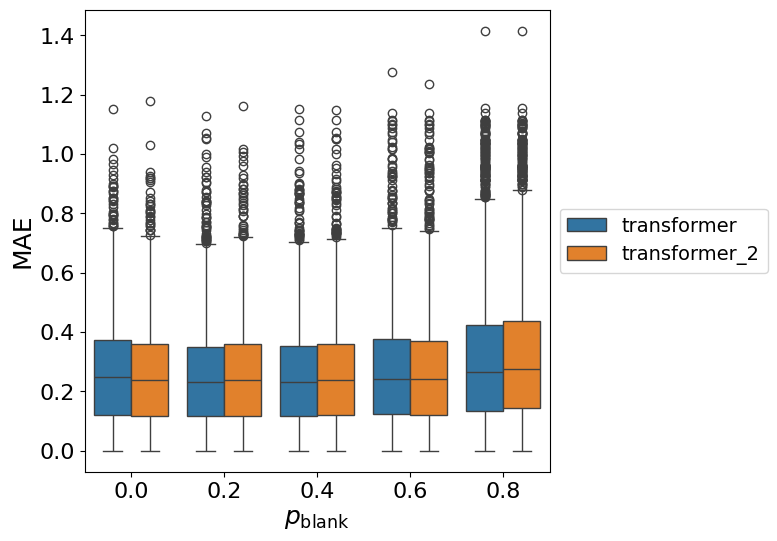

In [11]:
import seaborn as sns


fig, ax = plt.subplots()

sns.boxplot(df_tot, x="Blanking", y="MAE", hue="Model", ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r"$p_\text{blank}$")

# export
filename = f"blanking.pdf"
save_dir = "./figures"
if save_dir is not None:
    makedirs(save_dir, exist_ok=True)
    out_path = join(save_dir, filename)
    fig.savefig(out_path, format="pdf", bbox_inches="tight")
        
plt.show()